# Part A – Cluster Characterisation (Python, class-style)

This notebook follows the lecture style (missing values, imputation, simple visualisations) to explore the SMHS dataset and describe the four latent metabolic clusters.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 140)

general_path = "SMHS_general-1.csv"
validation_path = "SMHS_validation_students-1.csv"

general = pd.read_csv(general_path)
validation = pd.read_csv(validation_path)

general.shape, validation.shape

((1500, 29), (100, 28))

## Missingness overview and heatmap

In [3]:
general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1500 non-null   int64  
 1   age                        1500 non-null   int64  
 2   sex                        1500 non-null   object 
 3   ethnicity                  1500 non-null   object 
 4   latent_cluster             1500 non-null   int64  
 5   deprivation_index          1500 non-null   float64
 6   smoking_status             1500 non-null   object 
 7   alcohol_units_week         259 non-null    float64
 8   physical_activity_minutes  1500 non-null   float64
 9   diet_quality_score         1500 non-null   float64
 10  depression_score           1500 non-null   float64
 11  bmi                        1500 non-null   float64
 12  waist_hip_ratio            1500 non-null   float64
 13  sbp                        1500 non-null   float

In [4]:
missing_ratio = general.isna().mean().sort_values(ascending=False)
missing_ratio

,0
alcohol_units_week,0.827333
steps_per_day,0.144000
crp,0.080667
sleep_variability_hours,0.046000
fasting_insulin,0.024667
latent_cluster,0.000000
deprivation_index,0.000000
smoking_status,0.000000
physical_activity_minutes,0.000000
age,0.000000


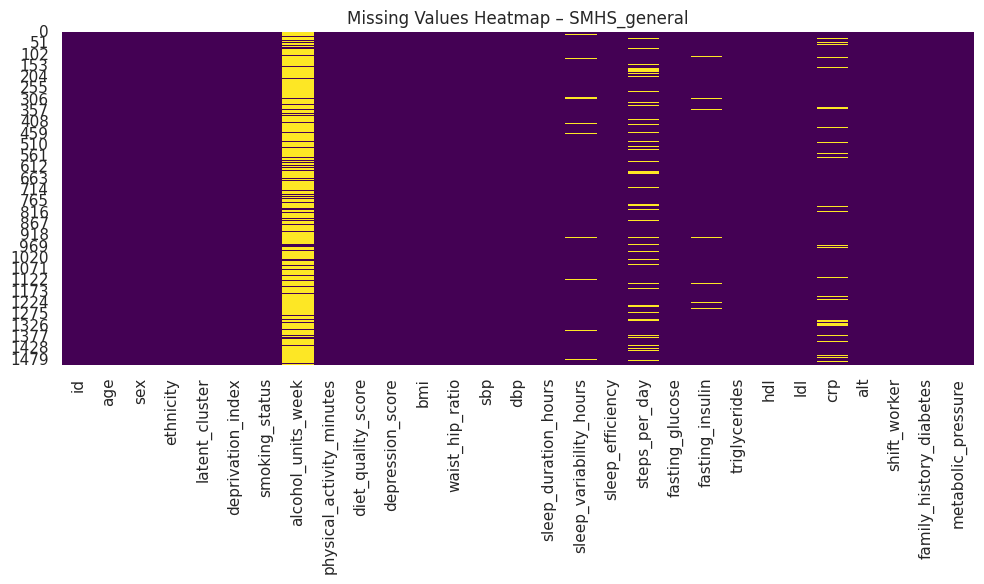

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(general.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap – SMHS_general")
plt.tight_layout()
plt.show()

## SimpleImputer and KNNImputer demonstration

In [6]:
numeric_features = general.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = general.select_dtypes(include=["object"]).columns.tolist()

# SimpleImputer for numeric
num_imputer = SimpleImputer(strategy="median")
general_num_imp = pd.DataFrame(num_imputer.fit_transform(general[numeric_features]), columns=numeric_features)

# SimpleImputer for categorical
cat_imputer = SimpleImputer(strategy="most_frequent")
general_cat_imp = pd.DataFrame(cat_imputer.fit_transform(general[categorical_features]), columns=categorical_features)

general_num_imp.isna().sum().head()

,0
id,0
age,0
latent_cluster,0
deprivation_index,0
alcohol_units_week,0


In [7]:
subset_vars = ["bmi", "fasting_glucose", "fasting_insulin", "triglycerides", "alt"]
knn_imputer = KNNImputer(n_neighbors=5)
general_knn_imp = pd.DataFrame(knn_imputer.fit_transform(general[subset_vars]), columns=subset_vars)
general_knn_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,1500.0,28.818955,6.303675,16.303238,23.137802,28.302516,34.767180,43.363405
fasting_glucose,1500.0,5.951697,0.953711,3.834467,5.130575,5.917708,6.679005,8.868749
fasting_insulin,1500.0,12.533740,9.889930,2.111613,5.314929,8.968881,17.125584,80.000000
triglycerides,1500.0,1.612791,1.004534,0.400000,0.854090,1.262844,2.188516,8.000000
alt,1500.0,26.687234,10.632852,5.000000,18.782737,24.502833,32.867029,67.254001


## Cluster-wise summaries and plots

In [8]:
general["latent_cluster"] = general["latent_cluster"].astype("category")
continuous_vars = [
    "age", "deprivation_index", "alcohol_units_week", "physical_activity_minutes",
    "diet_quality_score", "depression_score", "bmi", "waist_hip_ratio",
    "sbp", "dbp", "sleep_duration_hours", "sleep_variability_hours",
    "sleep_efficiency", "steps_per_day", "fasting_glucose", "fasting_insulin",
    "triglycerides", "hdl", "ldl", "crp", "alt", "metabolic_pressure"
]

group_means = general.groupby("latent_cluster")[continuous_vars].mean().round(2)
group_means

/tmp/ipython-input-1647897484.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_means = general.groupby("latent_cluster")[continuous_vars].mean().round(2)


,age,deprivation_index,alcohol_units_week,physical_activity_minutes,diet_quality_score,depression_score,bmi,waist_hip_ratio,sbp,dbp,sleep_duration_hours,sleep_variability_hours,sleep_efficiency,steps_per_day,fasting_glucose,fasting_insulin,triglycerides,hdl,ldl,crp,alt,metabolic_pressure
latent_cluster,,,,,,,,,,,,,,,,,,,,,,
1,49.52,34.90,6.15,274.64,81.46,3.64,23.01,0.82,121.10,75.84,7.65,0.42,93.65,11166.22,4.95,6.28,0.82,1.61,2.60,1.01,18.41,33.75
2,49.24,50.26,9.68,160.36,61.91,7.04,34.88,0.92,135.46,83.12,6.39,1.01,89.06,8348.42,5.99,14.62,1.95,1.20,3.60,4.31,28.95,56.17
3,51.40,68.33,18.07,105.33,53.08,8.53,34.24,0.96,142.67,88.03,5.88,1.50,85.03,6150.18,6.62,27.35,2.97,0.99,3.25,8.09,41.05,69.55
4,53.83,54.69,8.06,214.87,72.80,6.42,23.08,0.86,129.99,78.85,6.87,0.83,90.84,9377.61,7.22,4.31,1.03,1.40,2.79,2.44,22.87,50.78


In [9]:
key_vars = ["bmi", "fasting_glucose", "fasting_insulin", "triglycerides", "hdl", "alt", "metabolic_pressure"]
key_means = general.groupby("latent_cluster")[key_vars].mean().round(2)
key_means

/tmp/ipython-input-2675486329.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  key_means = general.groupby("latent_cluster")[key_vars].mean().round(2)


,bmi,fasting_glucose,fasting_insulin,triglycerides,hdl,alt,metabolic_pressure
latent_cluster,,,,,,,
1,23.01,4.95,6.28,0.82,1.61,18.41,33.75
2,34.88,5.99,14.62,1.95,1.20,28.95,56.17
3,34.24,6.62,27.35,2.97,0.99,41.05,69.55
4,23.08,7.22,4.31,1.03,1.40,22.87,50.78


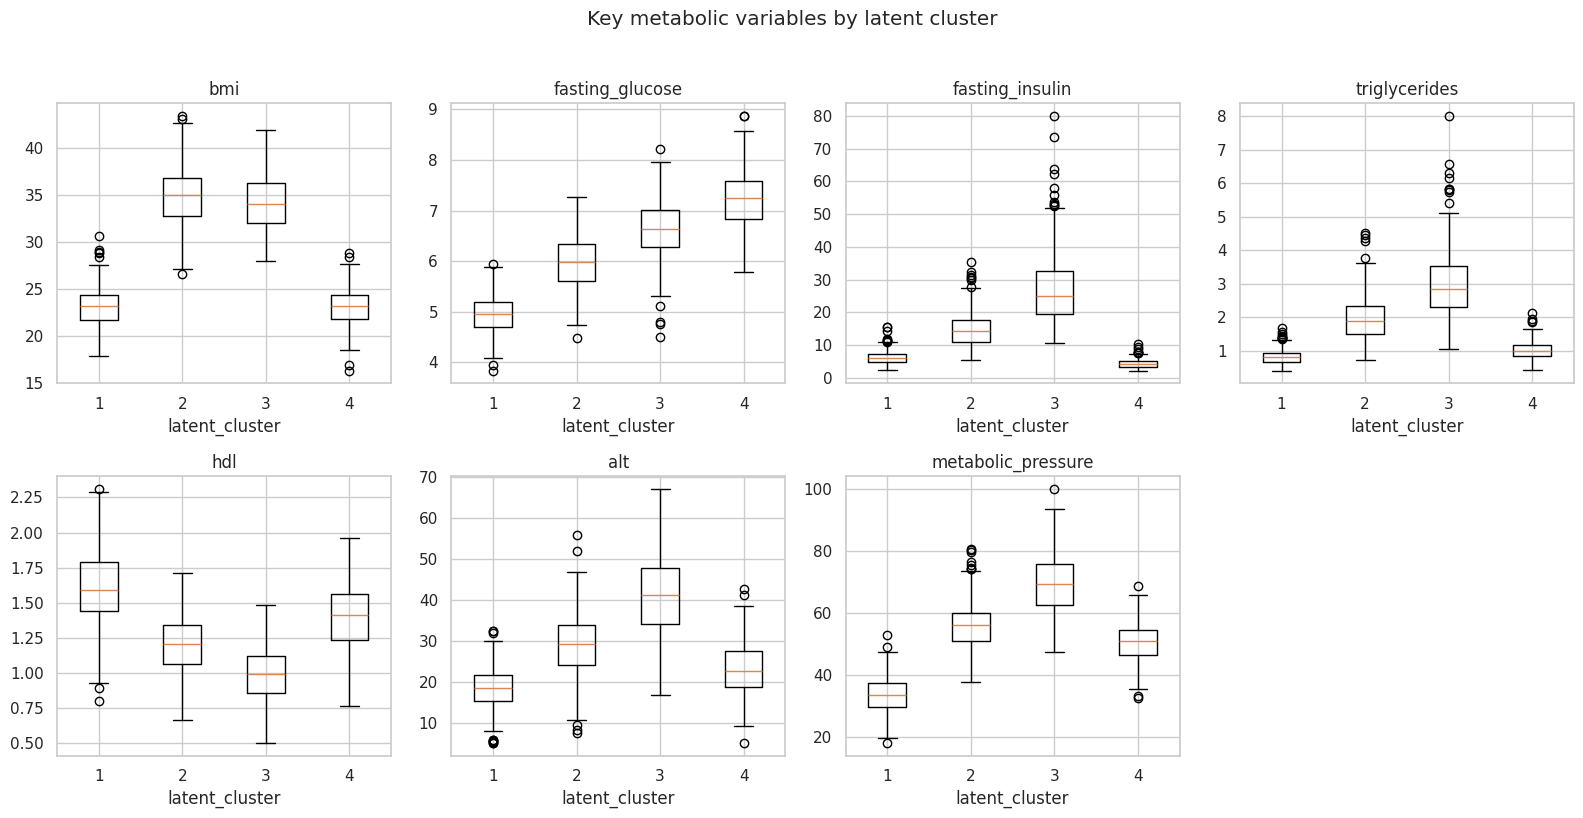

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
clusters = general["latent_cluster"].cat.categories

for i, var in enumerate(key_vars):
    ax = axes[i]
    data = [general.loc[general["latent_cluster"] == c, var].dropna() for c in clusters]
    ax.boxplot(data)
    ax.set_title(var)
    ax.set_xticks(range(1, len(clusters) + 1))
    ax.set_xticklabels(clusters)
    ax.set_xlabel("latent_cluster")

for j in range(len(key_vars), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Key metabolic variables by latent cluster", y=1.02)
fig.tight_layout()
plt.show()

In [11]:
categorical_vars = ["sex", "ethnicity", "smoking_status", "shift_worker", "family_history_diabetes"]
for col in categorical_vars:
    print(f"\n=== {col} (row-wise proportions) ===")
    display(pd.crosstab(general["latent_cluster"], general[col], normalize="index").round(2))


=== sex (row-wise proportions) ===


sex,F,M
latent_cluster,,
1,0.56,0.44
2,0.21,0.79
3,0.43,0.57
4,0.59,0.41



=== ethnicity (row-wise proportions) ===


ethnicity,,,Black,Black,Other,Other,SouthAsian,SouthAsian,White,White
latent_cluster,,,,,,,,,,
1,0.05,0.04,0.04,0.02,0.04,0.03,0.02,0.04,0.38,0.35
2,0.04,0.03,0.08,0.06,0.05,0.05,0.07,0.07,0.28,0.27
3,0.04,0.02,0.12,0.10,0.05,0.06,0.15,0.15,0.15,0.15
4,0.05,0.06,0.02,0.02,0.06,0.05,0.20,0.18,0.18,0.16



=== smoking_status (row-wise proportions) ===


smoking_status,.Current,Current,F+ormer,Former,Ne^ver,Nev*er,Nev_er,Never
latent_cluster,,,,,,,,
1,0.0,0.14,0.0,0.28,0.0,0.0,0.0,0.58
2,0.0,0.12,0.0,0.28,0.0,0.0,0.0,0.59
3,0.0,0.10,0.0,0.27,0.0,0.0,0.0,0.63
4,0.0,0.14,0.0,0.25,0.0,0.0,0.0,0.61



=== shift_worker (row-wise proportions) ===


shift_worker,No,Yes
latent_cluster,,
1,0.91,0.09
2,0.83,0.17
3,0.82,0.18
4,0.89,0.11



=== family_history_diabetes (row-wise proportions) ===


family_history_diabetes,0,1
latent_cluster,,
1,0.96,0.04
2,0.83,0.17
3,0.72,0.28
4,0.52,0.48


/tmp/ipython-input-3550898264.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_means = general.groupby("latent_cluster")[heatmap_vars].mean()


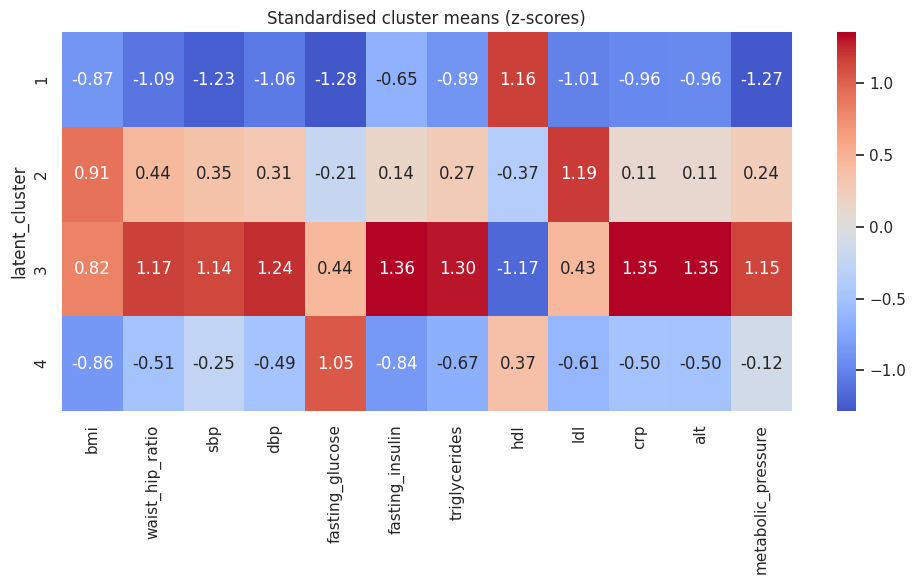

In [12]:
heatmap_vars = [
    "bmi", "waist_hip_ratio", "sbp", "dbp",
    "fasting_glucose", "fasting_insulin",
    "triglycerides", "hdl", "ldl",
    "crp", "alt", "metabolic_pressure"
]

cluster_means = general.groupby("latent_cluster")[heatmap_vars].mean()
cluster_means_z = (cluster_means - cluster_means.mean()) / cluster_means.std()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_z, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Standardised cluster means (z-scores)")
plt.tight_layout()
plt.show()

### Interpretation outline

- Cluster 1: metabolically healthy profile (normal BMI, low glucose/insulin, favourable lipids, low ALT).
- Cluster 2: obesity-driven MOD (highest BMI, moderately elevated insulin, triglycerides and ALT).
- Cluster 3: insulin-resistant, NAFLD-like (high BMI, very high insulin, high triglycerides, low HDL, highest ALT and metabolic pressure).
- Cluster 4: insulin-deficient, SIDD-like (normal BMI, highest glucose, lowest insulin, high family history of diabetes).
